#📌 Extracción

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#Primero, me entregan los datos en un link con github, para eso, tengo que leerlos desde ahí.
#Tengo que darle en el raw para poder leer la url de los datos, asi cargue la API y pude leer los archivos
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

datos = pd.read_json(url)


In [79]:
#la funcion normalize me ayuda a convertir diccionarios en columnas de datos, para una mejor visualizacion
df_customer = pd.json_normalize(datos['customer'])
display(df_customer)
display(df_customer.info())
#De ahora en adelante, estoy separando en distintas bases de datos los datos, para asi de mejor manera visualizarlos
#mi intencion es unirlos despues

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7267 non-null   object
 1   SeniorCitizen  7267 non-null   int64 
 2   Partner        7267 non-null   object
 3   Dependents     7267 non-null   object
 4   tenure         7267 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 284.0+ KB


None

In [80]:
df_phone = pd.json_normalize(datos['phone'])
display(df_phone)
display(df_phone.info())


,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No
...,...,...
7262,Yes,No
7263,Yes,Yes
7264,Yes,No
7265,Yes,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PhoneService   7267 non-null   object
 1   MultipleLines  7267 non-null   object
dtypes: object(2)
memory usage: 113.7+ KB


None

In [81]:
df_internet = pd.json_normalize(datos['internet'])
display(df_internet)
display(df_internet.info())

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...
7262,DSL,Yes,No,No,Yes,No,No
7263,Fiber optic,No,No,No,No,No,Yes
7264,DSL,No,Yes,No,No,No,No
7265,DSL,Yes,No,Yes,Yes,No,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   7267 non-null   object
 1   OnlineSecurity    7267 non-null   object
 2   OnlineBackup      7267 non-null   object
 3   DeviceProtection  7267 non-null   object
 4   TechSupport       7267 non-null   object
 5   StreamingTV       7267 non-null   object
 6   StreamingMovies   7267 non-null   object
dtypes: object(7)
memory usage: 397.5+ KB


None

In [82]:
df_account = pd.json_normalize(datos['account'])
display(df_account.info())
display(df_account)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7267 non-null   object 
 1   PaperlessBilling  7267 non-null   object 
 2   PaymentMethod     7267 non-null   object 
 3   Charges.Monthly   7267 non-null   float64
 4   Charges.Total     7267 non-null   object 
dtypes: float64(1), object(4)
memory usage: 284.0+ KB


None

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


In [83]:
# Asegurarnos de que el customerID esté en los dataframes normalizados para poder unirlos
# Agregamos la columna customerID a cada dataframe normalizado antes de unirlos
df_customer['customerID'] = datos['customerID']
df_phone['customerID'] = datos['customerID']
df_internet['customerID'] = datos['customerID']
df_account['customerID'] = datos['customerID']

# Unir los dataframes usando la columna customerID
df_merged = pd.merge(df_customer, df_phone, on='customerID', how='inner')
df_merged = pd.merge(df_merged, df_internet, on='customerID', how='inner')
df_merged = pd.merge(df_merged, df_account, on='customerID', how='inner')

# Agregar la columna 'Churn' del dataframe original 'datos'
df_merged['Churn'] = datos['Churn']

# Mostrar las primeras filas del dataframe unido
display(df_merged.head())
display(df_merged.info())
#Aqui notamos que la columna Charges.Total contiene datos numericos
#sin embargo sale que es tipo object, necesitamos cambiarlo a numerico y eliminar los datos nulos

,gender,SeniorCitizen,Partner,Dependents,tenure,customerID,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Churn
0,Female,0,Yes,Yes,9,0002-ORFBO,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,No
1,Male,0,No,No,9,0003-MKNFE,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,No
2,Male,0,No,No,4,0004-TLHLJ,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,Yes
3,Male,1,Yes,No,13,0011-IGKFF,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Yes
4,Female,1,Yes,No,3,0013-EXCHZ,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7267 non-null   object 
 1   SeniorCitizen     7267 non-null   int64  
 2   Partner           7267 non-null   object 
 3   Dependents        7267 non-null   object 
 4   tenure            7267 non-null   int64  
 5   customerID        7267 non-null   object 
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   object 


None

#🔧 Transformación

In [84]:
df_merged['Charges.Total'] = pd.to_numeric(df_merged['Charges.Total'], errors='coerce')
display(df_merged.info())
df_merged.isnull().sum()

#Creamos una nueva columna con el mismo nombre la que sera igual a un pd.to_numeric de la columna
#Charges.Total con errors = 'coerce', esto significa que cuando encuentre un valor que no pueda
#Ser transformado a un tipo float, este lo convertira en nulo, es por eso que podemos apreciar
#en nuestro info que esa columna ahora cuenta con menos valores no nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7267 non-null   object 
 1   SeniorCitizen     7267 non-null   int64  
 2   Partner           7267 non-null   object 
 3   Dependents        7267 non-null   object 
 4   tenure            7267 non-null   int64  
 5   customerID        7267 non-null   object 
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   object 


None

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
customerID,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [85]:
df_merged_sin_nulos = df_merged.dropna()
df_merged_sin_nulos.isnull().sum()


#Para resolver esto, vamos a tomar la decision de rellenar con 0 las filas que contengan estos valores, de cualquier
#caso podemos tambien hacer un estimado para no variar en el calculo, pero no se como hacerlo xd


,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
customerID,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [86]:
df_merged_sin_nulos.shape

(7256, 21)

In [87]:
for column in df_merged_sin_nulos.columns:
  print(f"Unique values for column '{column}':")
  print(df_merged[column].unique())
  print("-" * 30)


Unique values for column 'gender':
['Female' 'Male']
------------------------------
Unique values for column 'SeniorCitizen':
[0 1]
------------------------------
Unique values for column 'Partner':
['Yes' 'No']
------------------------------
Unique values for column 'Dependents':
['Yes' 'No']
------------------------------
Unique values for column 'tenure':
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
------------------------------
Unique values for column 'customerID':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
------------------------------
Unique values for column 'PhoneService':
['Yes' 'No']
------------------------------
Unique values for column 'MultipleLines':
['No' 'Yes' 'No phone service']
------------------------------
Unique values for column 'InternetServi

#📊 Carga y análisis

In [88]:
df_merged_sin_nulos = df_merged_sin_nulos[df_merged_sin_nulos['Churn'] != '']
df_merged_sin_nulos['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [89]:
df_limpia = df_merged_sin_nulos
df_limpia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   customerID        7032 non-null   object 
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [90]:
df_limpia = df_limpia.reset_index(drop=True)
df_limpia.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,customerID,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Churn
7027,Female,0,No,No,13,9987-LUTYD,Yes,No,DSL,Yes,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,No
7028,Male,0,Yes,No,22,9992-RRAMN,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,Yes
7029,Male,0,No,No,2,9992-UJOEL,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,No
7030,Male,0,Yes,Yes,67,9993-LHIEB,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,No
7031,Male,0,Yes,Yes,63,9995-HOTOH,No,No phone service,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.60,No


In [91]:
df_limpia.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [92]:
df_limpia.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'customerID', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Charges.Monthly', 'Charges.Total', 'Churn'],
      dtype='object')

In [93]:
df_limpia

,gender,SeniorCitizen,Partner,Dependents,tenure,customerID,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Churn
0,Female,0,Yes,Yes,9,0002-ORFBO,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,No
1,Male,0,No,No,9,0003-MKNFE,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,No
2,Male,0,No,No,4,0004-TLHLJ,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,Yes
3,Male,1,Yes,No,13,0011-IGKFF,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,Yes
4,Female,1,Yes,No,3,0013-EXCHZ,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Female,0,No,No,13,9987-LUTYD,Yes,No,DSL,Yes,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,No
7028,Male,0,Yes,No,22,9992-RRAMN,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,Yes
7029,Male,0,No,No,2,9992-UJOEL,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,No
7030,Male,0,Yes,Yes,67,9993-LHIEB,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,No


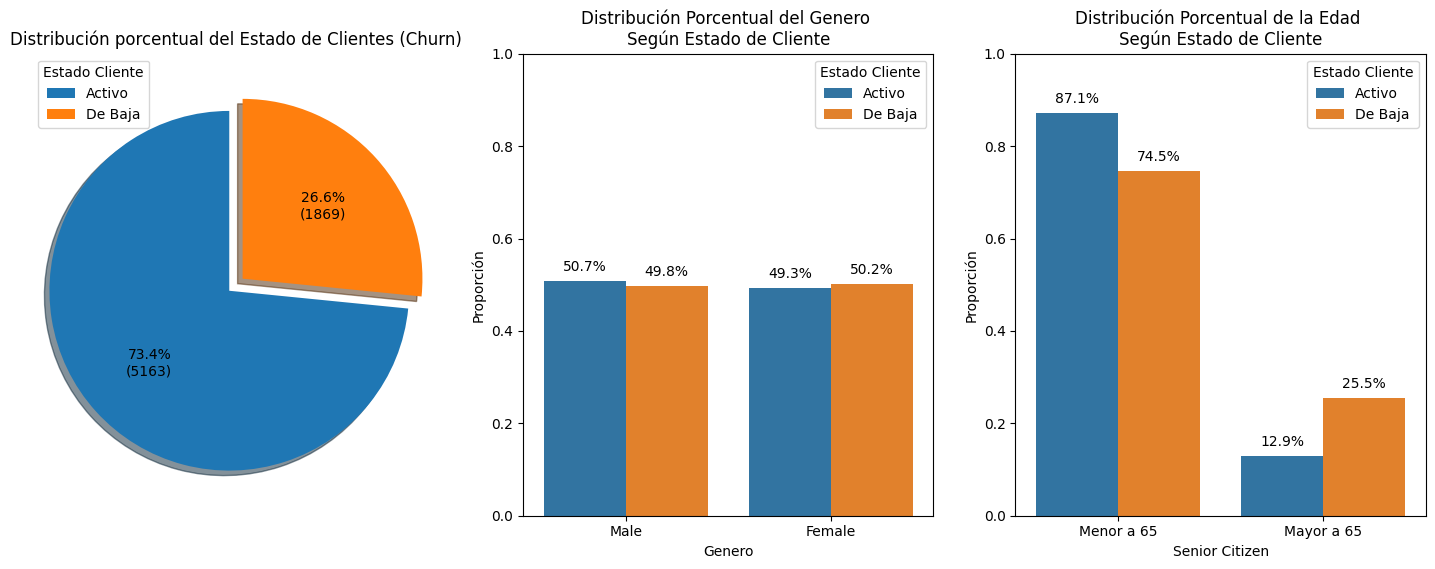

In [98]:

fig, axes = plt.subplots(1,3,figsize=(18,6))
axes= axes.flatten()

sizes = df_limpia['Churn'].value_counts(normalize=True)
explode = (0.1, 0)
counts = df_limpia['Churn'].value_counts()

def autopct_format(pct):
    total = sum(counts)
    val = int(round(pct*total/100.0))
    return '{:.1f}%\n({:d})'.format(pct, val)

axes[0].pie(sizes, explode=explode, autopct=autopct_format,
        shadow=True, startangle=90)
axes[0].axis('equal')

axes[0].legend(title='Estado Cliente',labels=['Activo','De Baja'])
axes[0].set_title('Distribución porcentual del Estado de Clientes (Churn)')



df_gender = df_limpia.groupby('Churn')['gender'].value_counts(normalize=True)
df_gender = pd.DataFrame(df_gender).reset_index()

sns.barplot(data=df_gender, x='gender', y='proportion', hue='Churn', ax=axes[1])

# Añadir etiquetas encima de cada barra con el porcentaje
for p in axes[1].patches:
    height = p.get_height()
    if height > 0:
        axes[1].annotate(f'{height:.1%}',(p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10,
                    color='black', xytext=(0, 5),
                    textcoords='offset points')


axes[1].set_title('Distribución Porcentual del Genero \nSegún Estado de Cliente')
axes[1].set_xlabel('Genero')
axes[1].set_ylabel('Proporción')

# Get the legend handles and labels
handles, labels = axes[1].get_legend_handles_labels()

# Set the new labels
new_labels = ['Activo', 'De Baja']
axes[1].legend(handles, new_labels, title='Estado Cliente')

# Set the y-axis limit to 1
axes[1].set_ylim(0, 1)

df_senior = df_limpia.groupby('Churn')['SeniorCitizen'].value_counts(normalize=True)
df_senior = pd.DataFrame(df_senior).reset_index()

sns.barplot(data=df_senior, x='SeniorCitizen', y='proportion', hue='Churn', ax=axes[2])

# Añadir etiquetas encima de cada barra con el porcentaje
for p in axes[2].patches:
    height = p.get_height()
    if height > 0:
        axes[2].annotate(f'{height:.1%}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')


axes[2].set_title('Distribución Porcentual de la Edad \nSegún Estado de Cliente')
axes[2].set_xlabel('Senior Citizen')
axes[2].set_ylabel('Proporción')

handles, labels = axes[2].get_legend_handles_labels()
new_labels = ['Activo', 'De Baja']

axes[2].legend(handles, new_labels, title='Estado Cliente')
axes[2].set_ylim(0, 1)
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(['Menor a 65', 'Mayor a 65'])



plt.show()

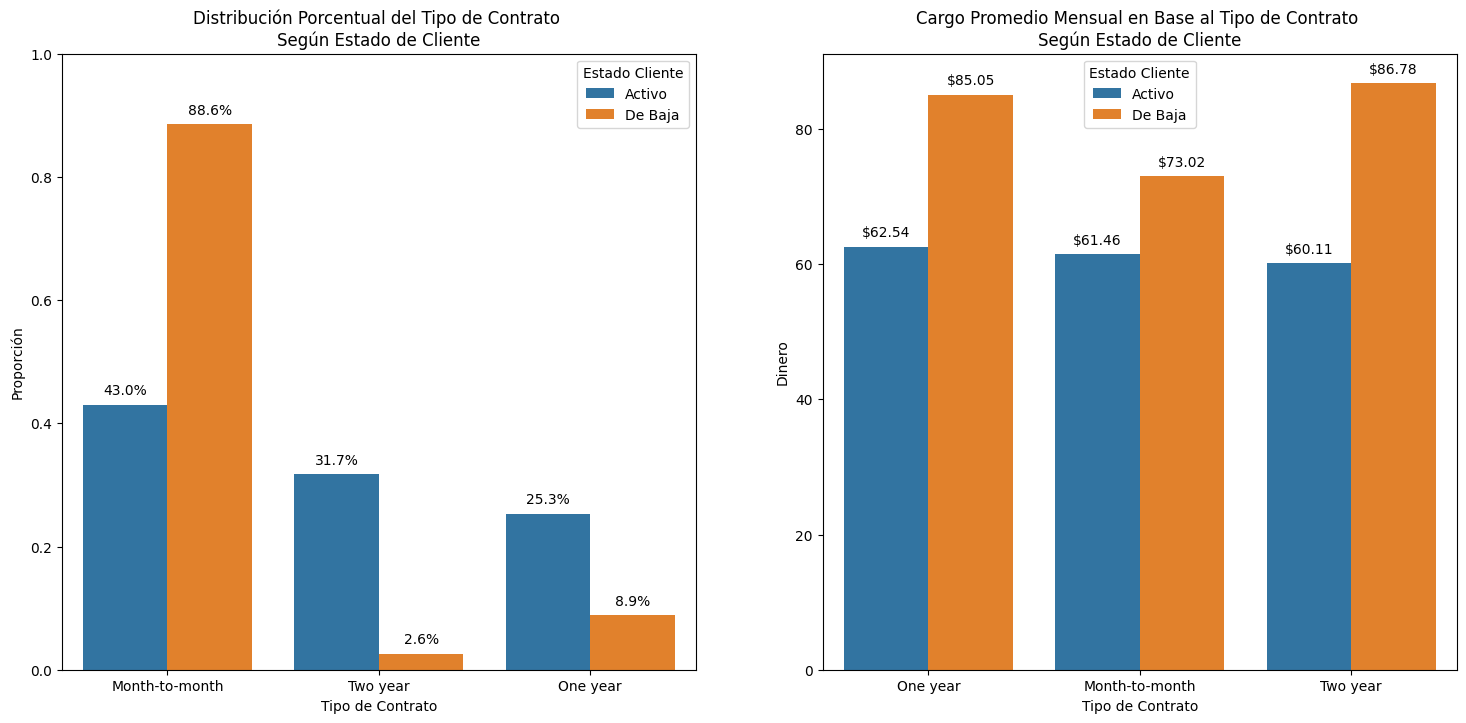

In [99]:
df_contract = df_limpia.groupby('Churn')['Contract'].value_counts(normalize=True)
df_contract = pd.DataFrame(df_contract).reset_index()

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
axes = axes.flatten()


sns.barplot(data=df_contract, x='Contract', y='proportion', hue='Churn', ax=axes[0])

for p in axes[0].patches:
    height = p.get_height()
    if height > 0:
        axes[0].annotate(f'{height:.1%}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

axes[0].set_title('Distribución Porcentual del Tipo de Contrato \nSegún Estado de Cliente')
axes[0].set_xlabel('Tipo de Contrato')
axes[0].set_ylabel('Proporción')
handles, labels = axes[0].get_legend_handles_labels()
new_labels = ['Activo', 'De Baja']
axes[0].legend(handles, new_labels, title='Estado Cliente')
axes[0].set_ylim(0, 1)


sns.barplot(data=df_limpia, x='Contract', y='Charges.Monthly', hue='Churn', ax= axes[1], errorbar=None)

for p in axes[1].patches:
    height = round(p.get_height(),2)
    if height > 0: # Only add label if height is greater than 0
        axes[1].annotate(f'${height}',  # Format as percentage
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

axes[1].set_title('Cargo Promedio Mensual en Base al Tipo de Contrato \nSegún Estado de Cliente')
axes[1].set_xlabel('Tipo de Contrato')
axes[1].set_ylabel('Dinero')
axes[1].legend(title='Estado Cliente',labels=['Activo','De Baja'])

plt.show()

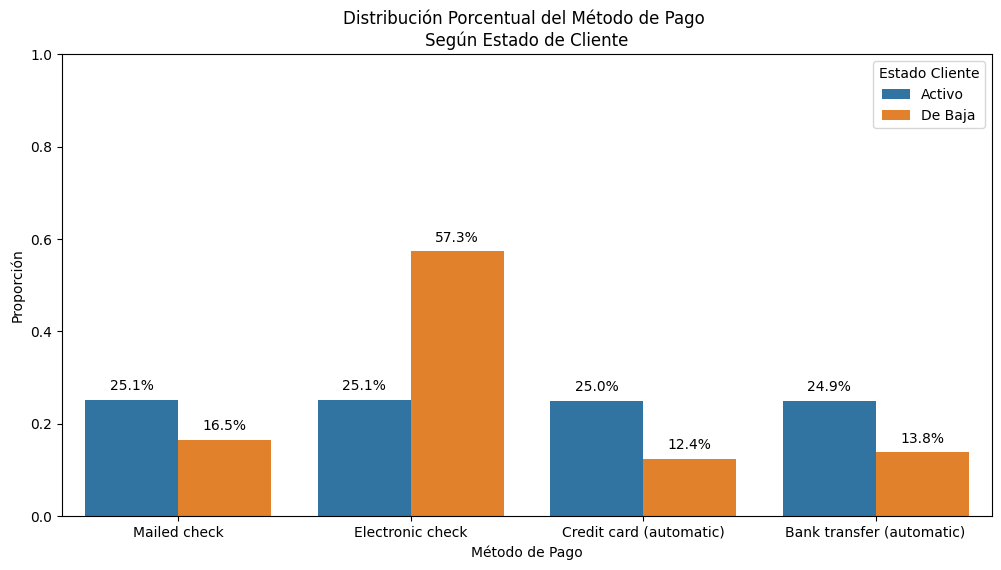

In [100]:
df_met_pago = df_limpia.groupby('Churn')['PaymentMethod'].value_counts(normalize=True)
df_met_pago = pd.DataFrame(df_met_pago)
fig, ax = plt.subplots(figsize=(12,6))

sns.barplot(data = df_met_pago, x='PaymentMethod', y='proportion', hue='Churn')
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1%}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

ax.set_title('Distribución Porcentual del Método de Pago \nSegún Estado de Cliente')
ax.set_xlabel('Método de Pago')
ax.set_ylabel('Proporción')
handles, labels = ax.get_legend_handles_labels()
new_labels = ['Activo', 'De Baja']
ax.legend(handles, new_labels, title='Estado Cliente')
ax.set_ylim(0, 1)


plt.show()


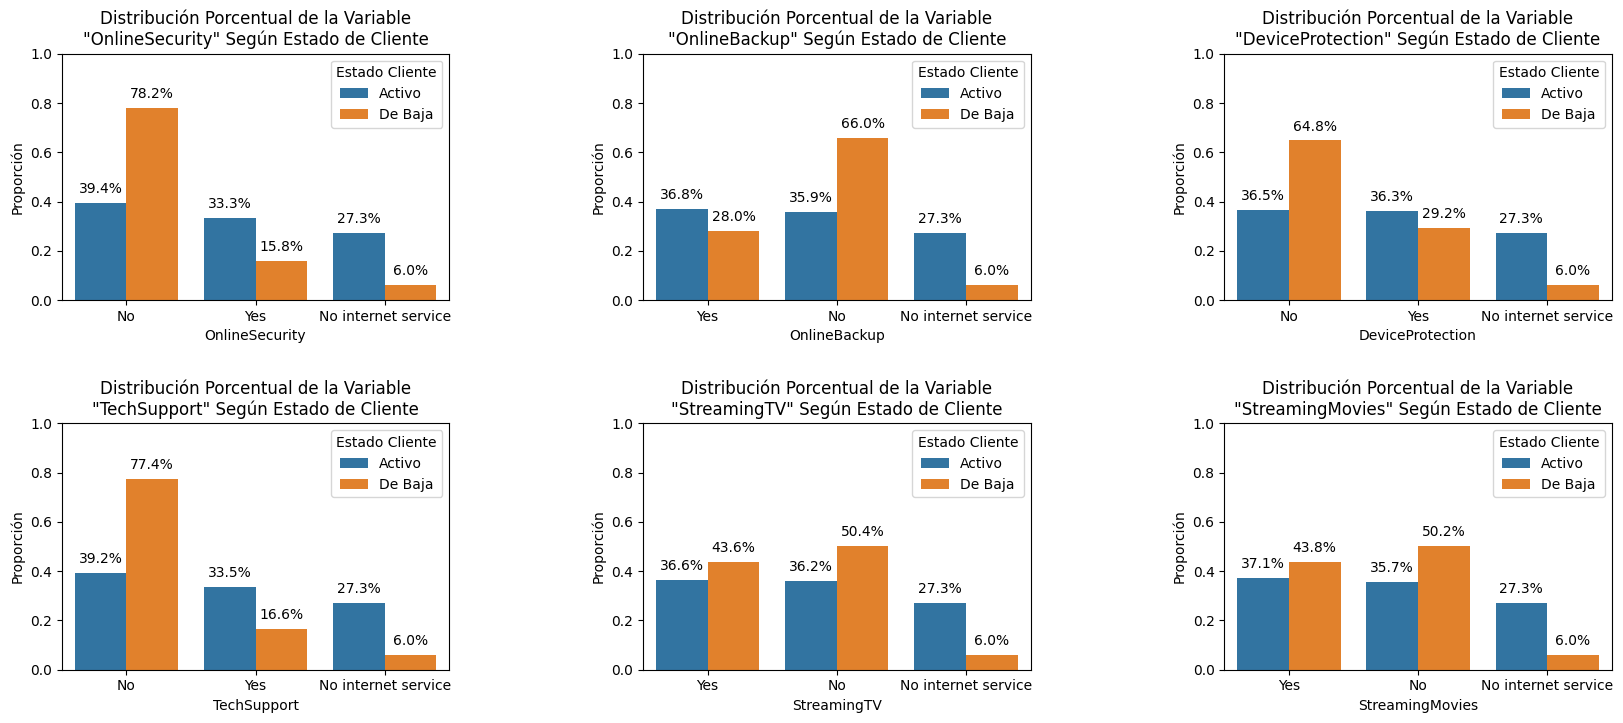

In [101]:
variables= ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
            'StreamingTV', 'StreamingMovies']
fig, axes = plt.subplots(2,3, figsize=(20,8))
fig.subplots_adjust(wspace=0.5, hspace=0.5)
axes = axes.flatten()

for i, var in enumerate(variables):
    df = df_limpia.groupby('Churn')[var].value_counts(normalize=True)
    df = pd.DataFrame(df).reset_index()
    sns.barplot(data = df, x= var, y= 'proportion', hue= 'Churn', ax= axes[i])

    for p in axes[i].patches:
        height = p.get_height()
        if height > 0:
            axes[i].annotate(f'{height:.1%}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')


    axes[i].set_title(f'Distribución Porcentual de la Variable\n"{var}" Según Estado de Cliente')
    axes[i].set_xlabel(f'{var}')
    axes[i].set_ylabel('Proporción')


    handles, labels = axes[i].get_legend_handles_labels()


    new_labels = ['Activo', 'De Baja']
    axes[i].legend(handles, new_labels, title='Estado Cliente')


    axes[i].set_ylim(0, 1)

plt.show()

#📄Informe final

🔹 **Introducción:** Este informe tiene por objetivo bucear en los datos como objetivo de tomar medidas al problema de evasión de clientes que tiene la empresa.

🔹 **Limpieza y Tratamiento de Datos:** Como primer paso extraemos la base de datos de la API proporcionada. Como es una base de datos en formato json, tenemos que normalizar esta base de datos para el posterior uso.
Una vez normalizadas las columnas de nuestra base de datos inicial, y sacados los datos anidados a esta, lo que hice fue unir las distintas bases de datos en una sola base de datos con todas las columnas.
Una vez tengo mi base de datos global, con todas las columnas de datos, el siguiente paso fue entender bien mis variables, y además saber si dentro de cada una de estas existen datos nulos.
Aquí notamos que la columna  “Charges.Total” que es una columna donde deberían haber datos numéricos, el tipo de dato era object, por lo que cambiamos el tipo de dato y en este momento identificamos filas de datos nulas, al ser pocas, las sacamos de la base de datos.
Luego, con un ciclo for buscamos en todas las columnas los valores únicos que contienen, para ver si existen valores atípicos. En este punto, pudimos identificar que en la columna “Churn” habían valores en blanco. Filas de datos que removimos para el mejor estudio de la base de datos.
Una vez limpios los datos empezamos el proceso de graficar.

**🔹 Análisis Exploratorio de Datos:**

**Churn:** 73,4% de los clientes se encuentran activos, mientras que el 26,6% se dio de baja.

**Género:** Esta variable se comporta similar en los clientes que se mantienen con lo que dejan la compañía.

**Adulto Mayor:** 25% de los clientes que se dieron de baja eran personas mayores a 65 años.

**Tipo de Contrato:** El 88,6% de los clientes que se dieron de baja contaban con un tipo de contrato mensual.

**Pago mensual promedio según el tipo de contrato:** Los clientes que se dieron de baja pagaban en promedio $20 más en cada tipo de contrato que los clientes activos.

**Método de Pago:** Cerca del 60% de los clientes que se dieron de baja contaban con un método de pago electrónico.

**Online Security:** El 78% de los clientes que se dieron de baja no contaban con un servicio de seguridad online.

**Online Backup:** El 66% de los clientes que se dieron de baja no contaban con un servicio de respaldo en línea.

**Device Protection:** El 64,8% de los clientes no contaban con un servicio de protección al equipo adicional.

**Tech Support:** El 77,4% de los clientes que se dieron de baja no contaban con un servicio de soporte técnico adicional.

🔹 **Conclusiones e Insights:**
El análisis de la base de datos evidencia que la principal causa de la fuga de clientes en la compañía telefónica está asociada a la combinación de contratos mensuales, pagos relativamente más altos y la ausencia de servicios adicionales de valor, especialmente aquellos relacionados con la seguridad, respaldo y soporte técnico. Aunque el género no influye significativamente en la decisión de baja, un cuarto de los clientes que se fueron corresponde a adultos mayores, lo que podría reflejar necesidades no cubiertas en este segmento. La alta proporción de bajas entre clientes con métodos de pago electrónicos sugiere que, a pesar de la conveniencia, este grupo podría estar más expuesto a ofertas de la competencia debido a su mayor digitalización y facilidad de cambio de proveedor.
En términos generales, los clientes que abandonaron la empresa pagaban en promedio $20 más que los que se mantienen, pero recibían menos beneficios adicionales, lo que genera una percepción negativa de valor y justifica el cambio hacia competidores que ofrezcan mejores condiciones.
Recomendaciones
1.	Revisar la política de precios y beneficios para contratos mensuales, ofreciendo tarifas más competitivas o paquetes que incluyan servicios adicionales sin costo adicional.
2.	Impulsar la contratación de servicios complementarios (seguridad online, respaldo en la nube, protección de dispositivos y soporte técnico), destacando cómo mejoran la experiencia y reducen riesgos.
3.	Diseñar planes especiales para adultos mayores, con asistencia personalizada, atención preferente y beneficios que cubran sus necesidades específicas.
4.	Implementar estrategias de fidelización para clientes digitales, como descuentos exclusivos o programas de puntos, para reducir la tentación de migrar a otras empresas.
5.	Proactivamente contactar a clientes en riesgo (especialmente quienes cumplen el perfil de alto pago y pocos servicios adicionales) para ofrecer mejoras y evitar su baja.
